## 6.4 U.S.A Real Estate Machine Learning Part 1 -NK (comparing acre_lot vs price)

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data prep for regression analysis
#### 3.  Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/nancykray/Desktop/Real Estate Project'

In [4]:
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_clean6.pkl'))

In [5]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date',
       'Price category'],
      dtype='object')

In [6]:
df.head(20)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.000,0,Middle price
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.000,0,Middle price
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.000,0,Middle price
6,1205.0,for_sale,50000.0,3.0,1.0,0.20,1298094.0,Ciales,Puerto Rico,639.0,2040.000,0,Low price
7,50739.0,for_sale,71600.0,3.0,2.0,0.08,1048466.0,Ponce,Puerto Rico,731.0,1050.000,0,Low price
8,81909.0,for_sale,100000.0,2.0,1.0,0.09,734904.0,Ponce,Puerto Rico,730.0,1092.000,0,Middle price
9,65672.0,for_sale,300000.0,5.0,3.0,7.46,1946226.0,Las Marias,Puerto Rico,670.0,5403.000,0,Middle price


In [7]:
df.shape

(2217918, 13)

#### Extreme Values Check

/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_28751/3919958516.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=15) # Shows extreme values
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 9950000.0)

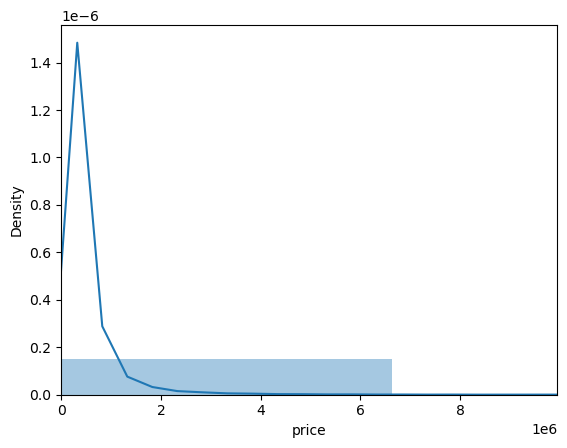

In [8]:
sns.distplot(df['price'], bins=15) # Shows extreme values
plt.xlim([0, 9950000 ]) # set x axis limits (I added this but doesn't seem to make a difference)

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

### 3. Data prep for regression analysis 

### Hypothesis: Properties with bigger acre_lots will have higher prices

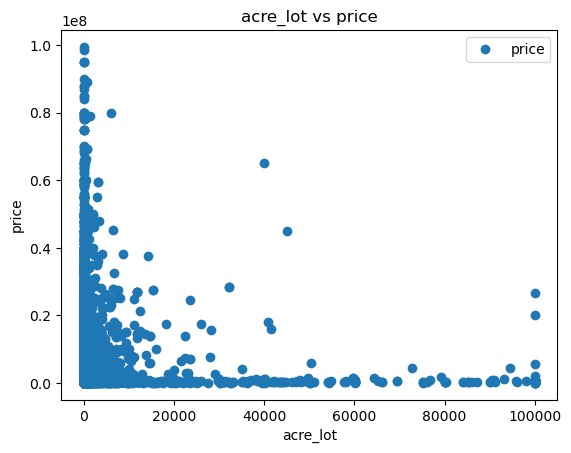

In [9]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'acre_lot', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('acre_lot vs price')  
plt.xlabel('acre_lot')  
plt.ylabel('price')  
plt.savefig('scatter_acre_lot_price.png')
plt.show()

In [10]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['acre_lot'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [11]:
X

array([[0.12],
       [0.08],
       [0.15],
       ...,
       [0.5 ],
       [0.09],
       [0.31]])

In [12]:
y

array([[105000.],
       [ 80000.],
       [ 67000.],
       ...,
       [440000.],
       [179900.],
       [580000.]])

In [13]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [14]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [15]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

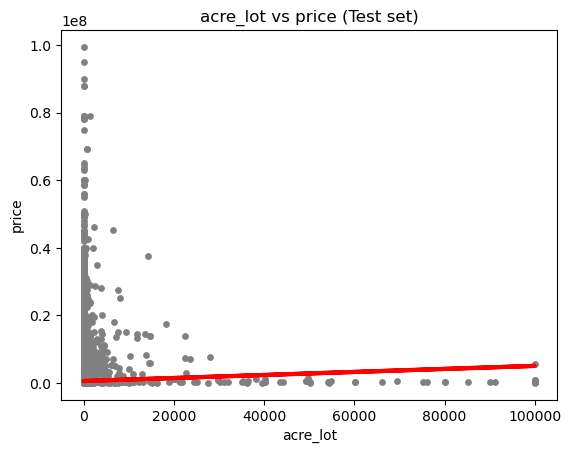

In [17]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('acre_lot vs price (Test set)')
plot_test.xlabel('acre_lot')
plot_test.ylabel('price')
plot_test.savefig('test_plot_acre_lot_price.png')
plot_test.show()

This line shows the expected trajectory of bigger acre lot correlating wtih higher price

In [18]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [19]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[44.83229133]]
Mean squared error:  1302013164047.8013
R2 score:  0.00020831045108560264


#### - Positive slope is slight (as x rises, y rises, meaning as number of acre_lot increases, so does the price)
#### - Mean squared error (MSE) doesn't make sense (too large), implicating that this does not have good accuracy
#### - R2 score is closer to 0 than 1, making it not a good fit

In [20]:
y_predicted

array([[520191.75624438],
       [520190.85959855],
       [520224.93213996],
       ...,
       [520193.10121312],
       [520886.20843711],
       [520185.47972359]])

In [21]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,59900.0,520191.756244
1,70000.0,520190.859599
2,175000.0,520224.932140
3,900000.0,520191.756244
4,63600.0,520185.479724
5,358900.0,520189.066307
6,44000.0,520194.446182
7,669900.0,520182.341463
8,175000.0,520224.932140
9,399000.0,520185.031401


##### Compare how the regression fits the training set

In [22]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [23]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [24]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[44.83229133]]
Mean squared error:  1292042243427.1018
R2 score:  0.000776271568361131


##### Compare to prior scores indicated below:
##### Slope: [[44.83229133]]  (slope is the same)
##### Mean squared error:  1302013164047.8013 (mean squared is higher but similar)
##### R2 score:  0.00020831045108560264 (R2 score is close to 0, meaning not a good fit)

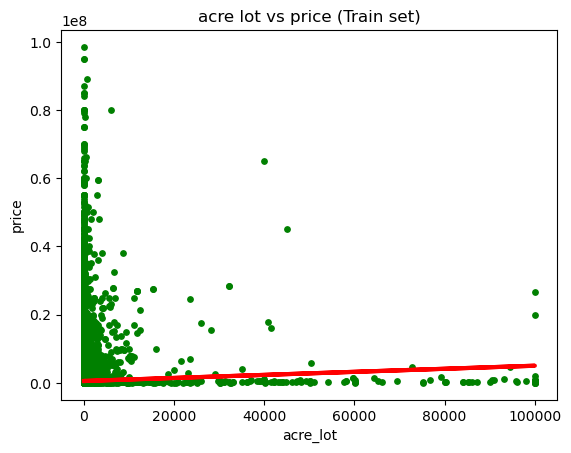

In [25]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('acre lot vs price (Train set)')
plot_test.xlabel('acre_lot')
plot_test.ylabel('price')
plot_test.savefig('train_plot_acre_lot_price.png')
plot_test.show()

In [26]:
#check mean
df['acre_lot'].mean()

12.981918592121072

In [27]:
#check median
df['acre_lot'].median()

0.26

In [28]:
#check max
df['acre_lot'].max()

100000.0

In [29]:
#check min
df['acre_lot'].min()

0.01

### Bonus: performance improvement after removing outliers

In [30]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['price'] <=100] 

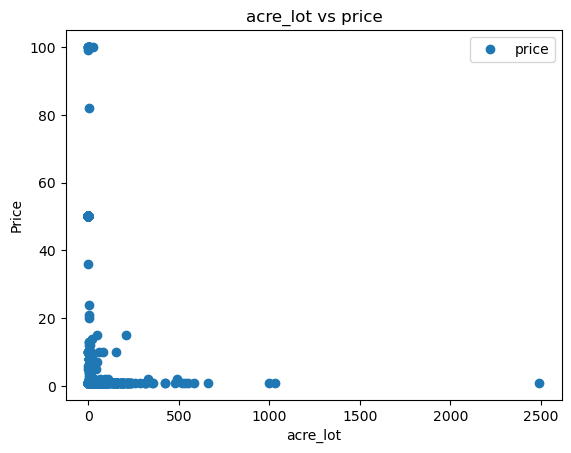

In [33]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'acre_lot', y='price', style='o')  
plt.title('acre_lot vs price')  
plt.xlabel('acre_lot')  
plt.ylabel('Price')  
plt.savefig('scatterplot2_acre_lot_price.png')
plt.show()

In [34]:
# Reshape again.

X_2 = df_test['acre_lot'].values.reshape(-1,1)
y_2 = df_test['price'].values.reshape(-1,1)

In [35]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [36]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [37]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [38]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.02377436]]
Mean squared error:  661.7706533579096
R2 score:  0.023671108047749634


##### negative slope is indicated ( as x rises, y drops, meaning as acre_lot rises, price drops)
##### MSE is very large indicating not a good fit (data varies too much)
##### R2 score is closer to 0, indicating a poor fit.

In [40]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,1.0,9.267540
1,1.0,13.037677
2,1.0,11.603846
3,1.0,7.722206
4,50.0,13.065256
5,50.0,13.065256
6,50.0,13.065256
7,100.0,13.057886
8,1.0,13.065256
9,1.0,10.848534


#### this data is a bit difficult to interpret, but the main take home factor is that this is showing that my hypothesis is false and that the bigger the acre lot, the lower the price of the home. 
##### I still have to get to the bottom of the pricing here.  Why do both my predicted variables of (number of bedrooms and size of acre lot) suggest that very high prices upon lower numbers.  I need to further investigate why this trend is happening consistently.  This information could be causing bias on the outcome of the total data points being measured, impacting any trend or correlation that could potentially be observed.